<a href="https://colab.research.google.com/github/JongHyun070105/MachineLearning2025/blob/main/3710%EB%B0%95%EC%A2%85%ED%98%84_Chapter6_%EC%88%98%EC%B9%98%ED%98%95_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AI모델링을 위해 수치형 데이터를 컴퓨터가 이해하기 쉬운 형태로 준비하는 전처리 과정알아보기
##데이터 전처리는 데이터 분석을 이해 데이터를 준비하는 모든 작업을 아울러 이르는 말임
## 데이터 탐색, 결측치와 이상치의 확인과 처리, 데이터의 변환에 이르는 모든 단계가 전처리에 포함됨

# SECTION 01. 수치형 데이터 정제하기

   
## 1. 결측치 파악하기
* 결측치(null)이란 데이터에 값이 없는 것
* 수집 누락, 데이터 유실 등 다양한 원인으로 발생할 수 있음
* 데이터 분석시 결측치는 반드시 처리해야 하는 값임
* 결측치는 N/A, NULL, NaN 등으로 표기되며 파이썬에서는 NaN으로 표기됨


In [1]:
# 판다스 불러오기
import pandas as pd

# 데이터 읽어오기
data = pd.read_csv('./Clean_Dataset.csv')

# 지정 인덱스인 첫번째 칼럼(column) 삭제하기
data.drop(data.columns[0], axis=1, inplace=True)

# 데이터 확인하기
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## 실습 데이터는 '항공권 가격 예측 데이터'의 Clean_Dataset.csv'를 사용
* Clean_Dataset.csv는 이미 한번 정제된 데이터로 결측치가 존재하지 않음
*  그러나 실무에서 사용하는 데이터는 실습데이터처럼 정제되어 있지 않을 가능성이 높으므로 결측치를 임의로 만들어 실습해보기
* 인덱스 범위내 랜덤 수 쌍을 5,000개 생성해서 위치에 해당하는 값을 결측치로 치환하기
* 랜덤수는 실제 생성 시점에 따라 달라지므로 처리결과는 실습시마다 다를 수 있음
* 다만, 1번과 3번 인덱스에 해당하는 값은 모두 결측치로 바꿔서 head()함수를 통해 실습의 결과를 확인하는 용도로 사용

In [2]:
# 랜덤하게 결측치 생성하기
# 랜덤과 넘파이 불러오기
import random
import numpy as np

# 같은 결과 출력을 위해 시드 고정하기
random.seed(2023)
np.random.seed(2023)

# 랜덤한 위치에 결측치를 5000개를 포함한 데이터 df_na 생성하기(5,000개 결측치 생성)
df_na = data.copy()
for i in range(0,5000):
    df_na.iloc[random.randint(0,300152), random.randint(0,10)] = np.nan

# 결측치 처리여부 확인을 위한 1번, 3번 인덱스 전체 결측치 처리하기(2개 결측치 생성)
df_na.iloc[1]=np.nan
df_na.iloc[3]=np.nan


In [3]:
# df_na의 앞쪽 5개 행(row) 을 출력

df_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


### 1) 결측치 존재 여부 확인하기

In [4]:
# df_na의 데이터 정보 확인하기

df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          299703 non-null  float64
 9   days_left         299723 non-null  float64
 10  price             299714 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


### 2) 결측치 수 확인하기

In [5]:
# 결측치 수 확인하기

df_na.isna().sum()

,0
airline,468
flight,464
source_city,472
departure_time,430
stops,487
arrival_time,455
destination_city,483
class,438
duration,450
days_left,430


In [6]:
#결측치 비율계산

missing_ratio = df_na.isna().sum()/len(df_na)*100
missing_ratio.round(2).sort_values()

,0
departure_time,0.14
days_left,0.14
class,0.15
flight,0.15
duration,0.15
price,0.15
arrival_time,0.15
source_city,0.16
destination_city,0.16
stops,0.16


## 2. 결측치 처리하기

In [7]:
# 데이터 변경에 대비하여 원본 데이터 복사하기

df_na_origin =df_na.copy()
df_na_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          299703 non-null  float64
 9   days_left         299723 non-null  float64
 10  price             299714 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


### 1) 결측치 삭제하기

In [8]:
# 결측치를 하나라도 가지는 행 모두 삭제하기
# dropna: 결측치(NaN)가 하나라도 있는 행(row) 전체를 삭제
df_na.dropna()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1.0,5955.0
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1.0,6060.0
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49.0,69265.0
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49.0,77105.0
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49.0,79099.0
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49.0,81585.0


In [9]:
# 결측치 삭제하기전 원래 데이터 가져오기

df_na = df_na_origin.copy()
# 결측치가 아닌 값이 8미만인 경우, 즉 결측치가 4개 이상
# df_na = df_na.dropna(thresh=8)
# df_na.info()

# 모든 데이터가 결측치인 행만 삭제하기
df_na = df_na.dropna(how='all')
df_na.info()



<class 'pandas.core.frame.DataFrame'>
Index: 300151 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          299703 non-null  float64
 9   days_left         299723 non-null  float64
 10  price             299714 non-null  float64
dtypes: float64(3), object(8)
memory usage: 27.5+ MB


In [10]:
# 0번 인덱스 부터 5개의 데이터를 불러와서 1번 3번 인덱스 삭제 결과 확인하기

df_na.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1.0,5955.0
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1.0,6060.0


### 2) 칼럼 제거하기

In [11]:
# 결측치 삭제하기전 원래 데이터 가져오기

df_na = df_na_origin.copy()

# 여기서는 컬럼 제거하기 실습으로 환승장수와 항공편 번호를 제거

df_na = df_na.drop(['stops', 'airline'], axis=1)
df_na.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flight            299689 non-null  object 
 1   source_city       299681 non-null  object 
 2   departure_time    299723 non-null  object 
 3   arrival_time      299698 non-null  object 
 4   destination_city  299670 non-null  object 
 5   class             299715 non-null  object 
 6   duration          299703 non-null  float64
 7   days_left         299723 non-null  float64
 8   price             299714 non-null  float64
dtypes: float64(3), object(6)
memory usage: 20.6+ MB


In [12]:
# 결측치를 하나라도 가지는 행 모두 삭제하기

df_na


,flight,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price
0,SG-8709,Delhi,Evening,Night,Mumbai,Economy,2.17,1.0,5953.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I5-764,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UK-963,Delhi,Morning,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...
300148,UK-822,Chennai,Morning,Evening,Hyderabad,Business,10.08,49.0,69265.0
300149,UK-826,Chennai,Afternoon,Night,Hyderabad,Business,10.42,49.0,77105.0
300150,UK-832,Chennai,Early_Morning,Night,Hyderabad,Business,13.83,49.0,79099.0
300151,UK-828,Chennai,Early_Morning,Evening,Hyderabad,Business,10.00,49.0,81585.0


In [13]:
# 만약 결측치가 특정 컬럼에만 많다면,
# 그 컬럼만 먼저 제거하고 나서 dropna() 하는 방식이
# 데이터 손실을 최소화할 수 있습니다.

df_na = df_na.dropna()
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296129 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flight            296129 non-null  object 
 1   source_city       296129 non-null  object 
 2   departure_time    296129 non-null  object 
 3   arrival_time      296129 non-null  object 
 4   destination_city  296129 non-null  object 
 5   class             296129 non-null  object 
 6   duration          296129 non-null  float64
 7   days_left         296129 non-null  float64
 8   price             296129 non-null  float64
dtypes: float64(3), object(6)
memory usage: 22.6+ MB


### 3) 결측치 대체하기

In [14]:
# df_na_origin을 복사해서 df_na에 저장
df_na = df_na_origin.copy()

In [15]:
# 칼럼별 평균값으로 결측치 대체하기
df_na = df_na.fillna(df_na.mean(numeric_only= True))

# df_na 데이터프레임의 기본적인 정보 요약

df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299685 non-null  object 
 1   flight            299689 non-null  object 
 2   source_city       299681 non-null  object 
 3   departure_time    299723 non-null  object 
 4   stops             299666 non-null  object 
 5   arrival_time      299698 non-null  object 
 6   destination_city  299670 non-null  object 
 7   class             299715 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  float64
 10  price             300153 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


In [18]:
# 숫자형(number) 데이터에 대해 결측치를 평균값으로 채워서 새로운 데이터프레임 df_na를 생성

df_na = df_na.fillna(df_na.select_dtypes(include='number').mean())


# object 타입 열은 최빈값으로 채우기


for col in df_na.select_dtypes(include='object').columns:
    df_na[col] = df_na[col].fillna(df_na[col].mode()[0], inplace = True)
df_na.info()
df_na

<ipython-input-18-3fa8aaf9b14f>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_na[col] = df_na[col].fillna(df_na[col].mode()[0], inplace = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           0 non-null       object 
 1   flight            0 non-null       object 
 2   source_city       0 non-null       object 
 3   departure_time    0 non-null       object 
 4   stops             0 non-null       object 
 5   arrival_time      0 non-null       object 
 6   destination_city  0 non-null       object 
 7   class             0 non-null       object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  float64
 10  price             300153 non-null  float64
dtypes: float64(3), object(8)
memory usage: 25.2+ MB


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,None,None,None,None,None,None,None,None,2.170000,1.000000,5953.000000
1,None,None,None,None,None,None,None,None,12.220991,26.006369,20888.967105
2,None,None,None,None,None,None,None,None,2.170000,1.000000,5956.000000
3,None,None,None,None,None,None,None,None,12.220991,26.006369,20888.967105
4,None,None,None,None,None,None,None,None,2.330000,1.000000,5955.000000
...,...,...,...,...,...,...,...,...,...,...,...
300148,None,None,None,None,None,None,None,None,10.080000,49.000000,69265.000000
300149,None,None,None,None,None,None,None,None,10.420000,49.000000,77105.000000
300150,None,None,None,None,None,None,None,None,13.830000,49.000000,79099.000000
300151,None,None,None,None,None,None,None,None,10.000000,49.000000,81585.000000


In [20]:
# df_na데이터 프레임의 0번 인덱스부터 5개의 데이터를 불러와서 1번과 3번 인덱스의 대체 결과 확인하기


df_na.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,None,None,None,None,None,None,None,None,2.170000,1.000000,5953.000000
1,None,None,None,None,None,None,None,None,12.220991,26.006369,20888.967105
2,None,None,None,None,None,None,None,None,2.170000,1.000000,5956.000000
3,None,None,None,None,None,None,None,None,12.220991,26.006369,20888.967105
4,None,None,None,None,None,None,None,None,2.330000,1.000000,5955.000000


##fillna(method='bfill')
* fillna()는 결측값(NaN)을 대체하는 함수.
* method='bfill'은 "backward fill", 즉 결측값을 아래(다음 행)의 값으로 채움을 의미.
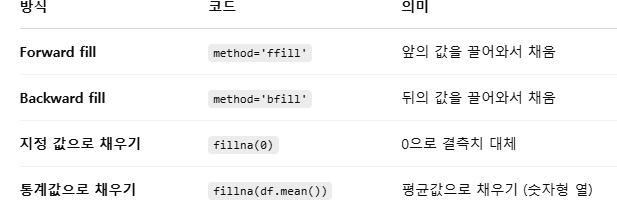

In [23]:
# bfill을 이용한 결측치 대체하기fillna(method='bfill')
df_na = df_na_origin.copy()
df_na = df_na.fillna(method='bfill')
df_na


<ipython-input-23-6d3bc6b2cc26>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_na = df_na.fillna(method='bfill')


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49.0,69265.0
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49.0,77105.0
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49.0,79099.0
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49.0,81585.0


In [25]:
#0번 인덱스부터 5개의 데이터를 불러와서 1번과 3번 인덱스의 대체 결과 확인하기
df_na.head()



,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


## 3. 이상치
* 보통 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값이나 큰 값을 의미
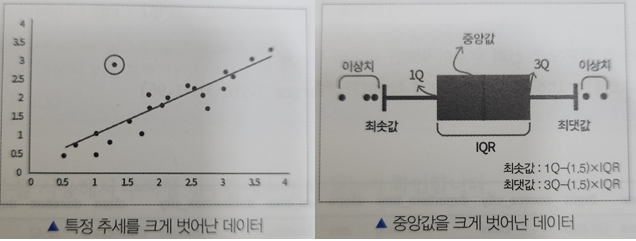
* 데이터 분석 또는 AI 모델링에서는 이상치가 의사결정에 큰 영향을 미칠 수 있기 때문에 데이터 전처리 과정에서 적절한 이상치 처리가 필수
* '데이터 범위에서 많이 벗어났다'의 기준에 어려움이 있으므로, 이상치 탐지를 위한 방법
 - 특정 추세를 크게 벗어난 데이터 -> 시각화(산점도, seaborn의 선형회귀모델그래프lmplo, 조인트 그래프 등)
 - 중앙값을 크게 벗어난 데이터-> (IRQ 확인, boxplot)

### 1) z-score로 확인하기
* 신뢰 구간과 관계
* 신뢰구간: 모수(전체 집단(모집단)의 특성을 나타내는 값)가 실제로 포함될 것으로 예측되는 범위
* 신뢰수준: 신뢰구간에 모집단의 실제 평균값이 포함될 확률

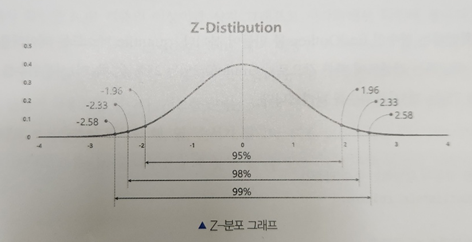

##1. Z-분포 (표준 정규분포)
* 평균이 0, 표준편차가 1인 정규분포
* 데이터가 평균에서 얼마나 떨어져 있는지를 Z값(Z-score)으로 나타냄
* 그래프 모양은 종(bell) 모양이며, 좌우 대칭

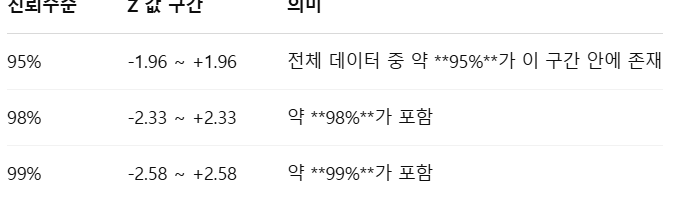


* 예를 들어 Z값이 ±1.96 사이에 있다면, 그 데이터는 평균에서 크게 벗어나지 않은 정상적인 값으로 간주

* 반대로 ±2.58을 넘는 값은 이상치(outlier) 혹은 희귀한 사건일 가능성이 있음

* Z-score = (데이터 값 - 평균) / 표준편차  
* -> 어떤 데이터가 평균보다 몇 표준편차만큼 떨어져 있는지를 수치로 보여줌
* Z-score는 **"이 값이 평균에서 얼마나 먼가요?"**를 객관적으로 수치화한 지표

* 평균을 빼면 → 중심이 0이 됨
* 표준편차로 나누면 → 퍼짐(분산)이 1이 됨

* 이걸 통해 데이터가 정규분포 형태로 변하고, 머신러닝 모델에서 더 안정적으로 학습할 수 있게 됨












In [44]:
# Z-score를 기준으로 신뢰 수준이 95%인 데이터 확인하기
data[abs(((data['price'] - data['price'].mean()) / data['price'].std())) > 1.96]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206691,Vistara,UK-809,Delhi,Evening,one,Morning,Mumbai,Business,12.42,1,74640
206692,Vistara,UK-813,Delhi,Evening,one,Morning,Mumbai,Business,14.67,1,74640
206693,Vistara,UK-809,Delhi,Evening,one,Night,Mumbai,Business,24.42,1,74640
206694,Vistara,UK-809,Delhi,Evening,one,Night,Mumbai,Business,26.00,1,74640
206695,Vistara,UK-813,Delhi,Evening,one,Night,Mumbai,Business,26.67,1,74640
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### 2) IQR(Inter Quartile Range)로 확인하기
* IRQ는 제3사분위수에서 제1사분위수를 뺀 값
* 제1사분위수에서 IRQ의 1.5배만큼을 뺀 값보다 작거나, 제3사분위수에서 IRQ의 1.5배만큼을 더한 값보다 큰 경우에 이상치로 판단



In [35]:
# IQR 기준 이상치 확인하는 함수 만들기
def findOutliers(x, column):
    # 제1사분위수 q1 구하기
    #quantile()는 데이터를 0에서 1 사이의 백분위로 나눌 때,해당 위치에 있는 값을 알려주는 함수
    q1 = x[column].quantile(0.25)

    # 제3사분위수 q3 구하기
    q3 = x[column].quantile(0.75)

    # IQR의 1.5배수 IQR 구하기
    iqr = 1.5 * (q3 - q1)

    # 제3사분위수에서 IQR의 1.5배보다 크거나 제1사분위수에서 IQR의 1.5배보다 작은값만 저장한 데이터 y 만들기
    y = x[(x[column] > q3 + iqr) | (x[column] < q1 - iqr)]

    # IQR기준 이상치 y 반환하기
    return len(y)

In [37]:
# price, duration, days_left 에 대하여 IQR기준 이상치 개수 확인하기
print("price IQR Outliers : ",findOutliers(data,'price'))
print("durationIQR Outliers : ",findOutliers(data,'duration'))
print("days_left IQR Outliers : ",findOutliers(data,'days_left'))

price IQR Outliers :  123
durationIQR Outliers :  2110
days_left IQR Outliers :  0


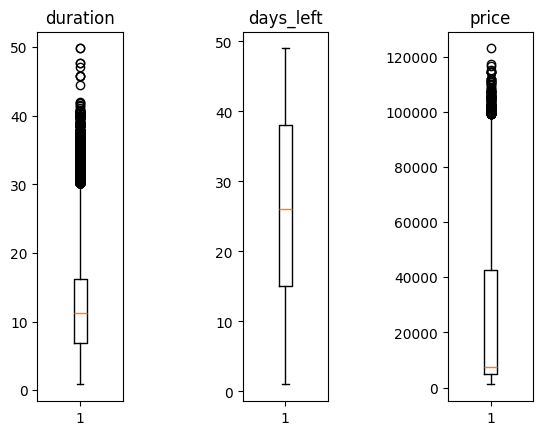

In [42]:
# 시각화를 위해 matplotlib.pyplot 불러오기
import matplotlib.pyplot as plt

plt.figure()
# 첫 번째 subplot : 1행 5열로 나눈영역에서 첫번째 영역('duration')
plt.subplot(1,5,1)
plt.boxplot(data['duration'])
plt.title('duration')

# 두 번째 subplot : 1행 5열로 나눈영역에서 세번째 영역('days_left')
plt.subplot(1,5,3)
plt.boxplot(data['days_left'])
plt.title('days_left')

# 세 번째 subplot : 1행 5열로 나눈영역에서 다섯번째 영역('price')
plt.subplot(1,5,5)
plt.boxplot(data['price'])
plt.title('price')

plt.show()

## 4. 이상치 처리하기

In [43]:
# 데이터 변형에 대비하여 데이터 원본 복사해두기
df_origin = data.copy()


### 1) 이상치 데이터 삭제하기

In [45]:
# 신뢰도 95% 기준 이상치 Index 추출하기

outlier = data[abs(((data['price'] - data['price'].mean()) / data['price'].std())) > 1.96].index
outlier

Index([206691, 206692, 206693, 206694, 206695, 206696, 206697, 206698, 206699,
       206784,
       ...
       300107, 300108, 300109, 300110, 300147, 300148, 300149, 300150, 300151,
       300152],
      dtype='int64', length=12493)

In [48]:
# 추출한 인덱스의 행 삭제해서 clean_df 데이터 만들기
clean_df = data.drop(outlier)
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 287660 entries, 0 to 300146
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           287660 non-null  object 
 1   flight            287660 non-null  object 
 2   source_city       287660 non-null  object 
 3   departure_time    287660 non-null  object 
 4   stops             287660 non-null  object 
 5   arrival_time      287660 non-null  object 
 6   destination_city  287660 non-null  object 
 7   class             287660 non-null  object 
 8   duration          287660 non-null  float64
 9   days_left         287660 non-null  int64  
 10  price             287660 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 26.3+ MB


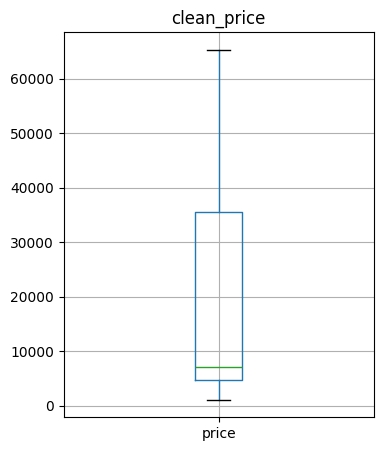

In [51]:
# 박스 그래프 활용하여 이상치 제거 여부 확인하기
plt.figure(figsize=(4,5))
clean_df[['price']].boxplot()
plt.title('clean_price')
plt.show()

### 2) 이상치 데이터 대체하기

In [53]:
# IQR 기준 이상치를 대체하는 함수 만들기
def changeOutliers(x, column):
  q1 = x[column].quantile(0.25)
  q3 = x[column].quantile(0.75)

  iqr = 1.5 * (q3 - q1)

  Min = (q1 - iqr)
  Max = (q3 + iqr)

  # Max 보다 큰 값은 Max로 대체, Min 보다 작은 값은 Min으로 대체하기

  x.loc[(x[column] > Max) , column] = Max
  x.loc[(x[column] < Min) , column] = Min

  return (x)

clean_df = changeOutliers(data, 'price')
clean_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [54]:
# 이상치를 삭제한 사례와 달리, 데이터 수가 감소하지 않은 것(300153)개확인


clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [55]:

# findOutliers 함수를 사용하여 항공권 가격의 이상치가 잘 대체 되었는지 확인
# price에 대하여 IQR기준 이상치 개수 확인하기

print(findOutliers(clean_df, 'price'))




0


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


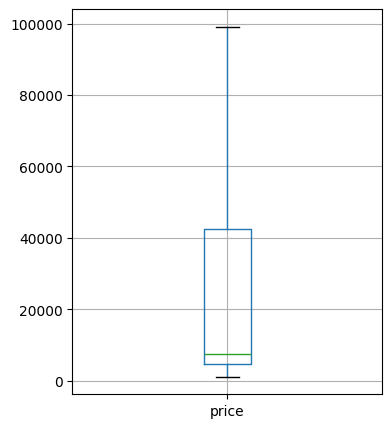

In [58]:
# 박스그래프 활용하여 이상치 대체 여부 확인하기

plt.figure(figsize = (4,5))
clean_df[['price']].boxplot()
plt.show()

## 5. 구간화(binning)하기
* 연속형 데이터를 특정구간으로 나누어 범주형 또는 순위형으로 변환하는 방법
 - 수능 성적을 등급으로 변환
 - 나이를 세대로 나누는 것

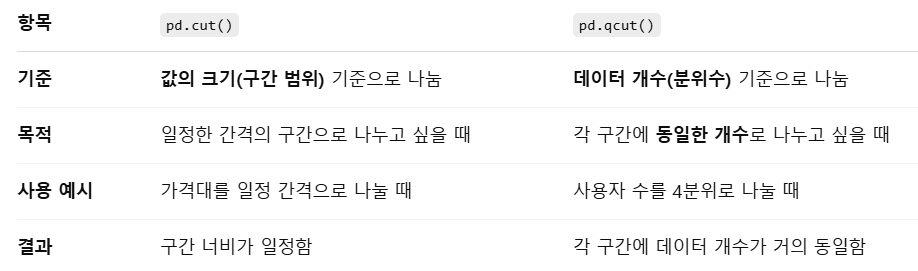

## 1) 동일 길이로 구간화하기(cut())
* cut() 구간화 할 때 : bins, labels를 반드시 지정


In [59]:
# 비행시간을 0~5, 5~10, 10 이상의 3개의 구간으로 나누어 거리(distance)칼럼(short, medium, long) 생성하기
data['distance'] = pd.cut(data['duration'],
                          bins = [0,5,10, data['duration'].max()],
                          labels =['short','medium','long'] )
data['distance']

,distance
0,short
1,short
2,short
3,short
4,short
...,...
300148,long
300149,long
300150,long
300151,medium


In [60]:
# 거리 칼럼의 빈도분포 확인하기
data['distance'].value_counts()



,count
distance,
long,169879
medium,84761
short,45513


### 2) 동일 개수로 구간화하기
* qcut()과 cut()은 사용방법이 동일


In [65]:
# 항공권 가격(price)를 4개 구간으로 동일하게 나누어 항공권 가격 비율 칼럼 생성하기
data['price_rate'] = pd.qcut(data['price'], q = 4, labels = ['cheap','normal','expensive','too expensive'])
data['price_rate']


,price_rate
0,normal
1,normal
2,normal
3,normal
4,normal
...,...
300148,too expensive
300149,too expensive
300150,too expensive
300151,too expensive


In [66]:
# 항공권 가격 비율 칼럼의 빈도 분포 확인하기
data['price_rate'].value_counts()


,count
price_rate,
expensive,75584
normal,75117
cheap,75073
too expensive,74379
